In [1]:
%load_ext autoreload
%autoreload 2
from trade.assets.OptionStructure import OptionStructure
from trade.assets.helpers.loaders import create_object_from_id
from trade.helpers.Context import Context
from trade.assets.Calculate import Calculate
import yfinance as yf   
import pandas as pd
import numpy as np
import threading


Console Logging & File Logging Can be configured using STREAM_LOG_LEVEL and FILE_LOG_LEVEL in environment variables.
Propagate to root logger can be set using PROPAGATE_TO_ROOT_LOGGER in environment variables.
Example:
STREAM_LOG_LEVEL = 'DEBUG'
FILE_LOG_LEVEL = 'INFO'
PROPAGATE_TO_ROOT_LOGGER = 'False'

2025-02-21 21:21:19 trade.helpers.Logging INFO: Logging Root Directory: /Users/chiemelienwanisobi/cloned_repos/QuantTools/logs
Using Proxy URL: http://18.232.166.224:5500/thetadata


In [2]:
yf.__version__
display(threading.active_count())
display(threading.enumerate())

8

[<_MainThread(MainThread, started 140704647658240)>,
 <Thread(IOPub, started daemon 123145338761216)>,
 <Heartbeat(Heartbeat, started daemon 123145355550720)>,
 <Thread(Thread-1 (_watch_pipe_fd), started daemon 123145373413376)>,
 <Thread(Thread-2 (_watch_pipe_fd), started daemon 123145390202880)>,
 <ControlThread(Control, started daemon 123145406992384)>,
 <HistorySavingThread(IPythonHistorySavingThread, started 123145423781888)>,
 <Consumer(Thread-4, started daemon 123145441107968)>]

In [3]:
def _create_object_from_id(*args ,**kwargs):
    try:
        return create_object_from_id(*args, **kwargs)
    except Exception as e:
        print(e)
        print(kwargs, args)
        return None

## Import Trades

In [4]:
trades = pd.read_csv('/Users/chiemelienwanisobi/cloned_repos/QuantTools/EventDriven/output/profitable_trades_options.csv').iloc[:, 1:]
trades

,Ticker,PnL,EntryPrice,ExitPrice,ReturnPct,Quantity,EntryTime,ExitTime,Duration,Positions
0,TSLA,-469.319634,200.595187,157.929765,-21.269414,11,2023-07-05,2023-08-02,28,&L:TSLA20240621C333.33&S:TSLA20240621C340
1,AAPL,1.565517,200.443306,200.704226,0.130171,6,2023-07-05,2023-08-04,30,&L:AAPL20240621C230&S:AAPL20240621C240
2,MSFT,-276.544545,200.353116,160.846753,-19.718367,7,2023-07-05,2023-08-09,35,&L:MSFT20240621C370&S:MSFT20240621C375
3,AMZN,-43.770957,200.305228,156.534271,-21.852129,1,2023-07-05,2023-10-25,112,&L:AMZN20240621C165&S:AMZN20240621C175
4,NVDA,25078.793707,190.955251,2977.487885,1459.259494,9,2023-07-05,2024-07-01,362,&L:NVDA20240621C770&S:NVDA20240621C800
5,BA,-30.225169,185.573604,155.348435,-16.287429,1,2023-08-10,2023-08-17,7,&L:BA20240621C300&S:BA20240621C310
6,WMT,0.000000,NaN,NaN,NaN,0,2023-08-10,2023-08-17,7,&L:WMT20240621C175&S:WMT20240621C180
7,TSLA,-43.298192,200.384529,195.573618,-2.400839,9,2023-08-17,2023-10-20,64,&L:TSLA20240920C305&S:TSLA20240920C315
8,AAPL,-298.098050,199.060910,149.377901,-24.958697,6,2023-08-31,2023-09-07,7,&L:AAPL20240920C260&S:AAPL20240920C310
9,INTC,0.000000,NaN,NaN,NaN,0,2023-09-15,2023-09-20,5,&L:INTC20240621C40&S:INTC20240621C45


## Create empty dataframe for attribution & greeks


In [5]:
attribution = pd.DataFrame(index = pd.date_range(trades.EntryTime.min(), trades.ExitTime.max(), freq='B'))
greeks = pd.DataFrame(index = pd.date_range(trades.EntryTime.min(), trades.ExitTime.max(), freq='B'))

## Load Each Structure, with specified context

In [ ]:
trades['Structure'] = trades.apply(lambda x: _create_object_from_id(x['Positions'], x['ExitTime']), axis=1)

In [11]:
# trades[trades.Structure.isna()] = 
series = trades[trades.Structure.isna()].apply(lambda x: _create_object_from_id(x['Positions'], x['EntryTime']), axis=1)
trades.loc[trades.Structure.isna(), 'Structure'] = series
trades

,Ticker,PnL,EntryPrice,ExitPrice,ReturnPct,Quantity,EntryTime,ExitTime,Duration,Positions,Structure
0,TSLA,-2435.488156,200.386768,158.395593,-20.955064,58,2023-07-05,2023-08-02,28,&L:TSLA20240621C333.33&S:TSLA20240621C340,"CallVertical(TSLA, Build On: 2023-08-02 16:00:00)"
1,AAPL,-2.688171,200.843021,200.761561,-0.040559,33,2023-07-05,2023-08-04,30,&L:AAPL20240621C230&S:AAPL20240621C240,"CallVertical(AAPL, Build On: 2023-08-04 16:00:00)"
2,MSFT,-1405.469374,200.989909,160.833641,-19.979246,35,2023-07-05,2023-08-09,35,&L:MSFT20240621C370&S:MSFT20240621C375,"CallVertical(MSFT, Build On: 2023-08-09 16:00:00)"
3,AMZN,-433.030018,200.892755,152.778308,-23.950314,9,2023-07-05,2023-10-25,112,&L:AMZN20240621C170&S:AMZN20240621C182.5,"CallVertical(AMZN, Build On: 2023-10-25 16:00:00)"
4,NVDA,133674.653341,190.394173,2975.282784,1462.696347,48,2023-07-05,2024-07-01,362,&L:NVDA20240621C770&S:NVDA20240621C800,"CallVertical(NVDA, Build On: 2023-07-05 16:00:00)"
5,BA,-240.652620,185.467519,155.385942,-16.219324,8,2023-08-10,2023-08-17,7,&L:BA20240621C300&S:BA20240621C310,"CallVertical(BA, Build On: 2023-08-10 16:00:00)"
6,WMT,2.122548,175.943801,178.066349,1.206379,1,2023-08-10,2023-08-17,7,&L:WMT20240621C175&S:WMT20240621C180,"CallVertical(WMT, Build On: 2023-08-17 16:00:00)"
7,TSLA,-221.844005,200.276447,195.556361,-2.356785,47,2023-08-17,2023-10-20,64,&L:TSLA20240920C305&S:TSLA20240920C315,"CallVertical(TSLA, Build On: 2023-10-20 16:00:00)"
8,AAPL,-1682.755271,199.079386,149.586584,-24.860837,34,2023-08-31,2023-09-07,7,&L:AAPL20240920C260&S:AAPL20240920C310,"CallVertical(AAPL, Build On: 2023-09-07 16:00:00)"
9,INTC,-25.909441,177.260283,151.350843,-14.616608,1,2023-09-15,2023-09-20,5,&L:INTC20240621C40&S:INTC20240621C45,"CallVertical(INTC, Build On: 2023-09-20 16:00:00)"


## Produce Greeks & PnL

In [32]:
OptionStructure.greeks?


Signature:
OptionStructure.greeks(
    self,
    greek_type='greek',
    ts_start=None,
    ts_end=None,
    ts_timewidth=None,
    ts_timeframe=None,
    return_all=False,
)
Docstring:
The greeks method returns a timeseries dataframe for greeks based. Only available for BSM model

PARAMS
______
ts (Bool): True to return dataframe timeseries, false to return spot in a dict
ts_start (str|datetime): Start Date
ts_end (str|datetime): End Date
ts_timewidth (str|int): Steps in timeframe
ts_timeframe (str): Target timeframe for series 
greek_type (str): Type of greek to return. Default is 'greek'.
    'greek' returns all greek, while passing 'delta', 'gamma', 'theta', 'vega' returns only the specific greek
return_all (bool): True to return all from each leg, False to return only the aggregate greeks


RETURNS
_________
pd.DataFrame or dict
File:      ~/cloned_repos/QuantTools/trade/assets/OptionStructure.py
Type:      function

In [31]:
Calculate.attribution?

Signature:
Calculate.attribution(
    asset,
    ts_start=None,
    ts_end=None,
    ts_timeframe='day',
    ts_timewidth='1',
    method='GB',
    replace='partial',
    return_both_data=False,
    **kwargs,
)
Docstring:
Calculate attribution of option asset 

Parameter:
____________
ts_start (str | Datetime): Start date if timeseries
ts_end (str | Datetime): End date if timeseries  
ts_timewidth (int): Examples 1,2,3,4. The span over the timeframe
ts_timeframe (str): The timeframe for aggregation, eg: Minute, Hour, Day, Month, Week, Year
method (str): Available methods are 'GB' for Greek Based and 'RV' for Revaluation
replace (str): Available options are 'partial', 'close', 'default_fill'. Partial replaces only the missing data, Close uses close data to fill, default_fill uses the default fill for all data
return_both_data (bool): If True. Will return both the PnL Data and Full Data
return_all: specific to OptionStructure. If True, will return all the data for the long and short leg


In [38]:
date_range = pd.date_range(trades.EntryTime.min(), trades.ExitTime.max(), freq='B')

for index, row in trades.iterrows():
    print(index)
    
    start = row['EntryTime']
    end = row['ExitTime']
    structure = row['Structure']
    quantity = row['Quantity']
    pnl = Calculate.attribution(structure, start, end, method = 'RV') * quantity 
    greeks = structure.greeks('greek', start, end) * quantity * 100
    if index == 0:
        attribution = pd.DataFrame(index = date_range,
                                data = {x: [0] * len(date_range) for  x in pnl.columns})
        pt_greeks = pd.DataFrame(index = date_range,
                                data = {x: [0] * len(date_range) for  x in greeks.columns})
    
    attribution += pnl
    pt_greeks += greeks
    attribution.fillna(0, inplace=True)
    pt_greeks.fillna(0, inplace=True)
    break

0


In [25]:
trades

,Ticker,PnL,EntryPrice,ExitPrice,ReturnPct,Quantity,EntryTime,ExitTime,Duration,Positions
0,TSLA,-469.319634,200.595187,157.929765,-21.269414,11,2023-07-05,2023-08-02,28,&L:TSLA20240621C333.33&S:TSLA20240621C340
1,AAPL,1.565517,200.443306,200.704226,0.130171,6,2023-07-05,2023-08-04,30,&L:AAPL20240621C230&S:AAPL20240621C240
2,MSFT,-276.544545,200.353116,160.846753,-19.718367,7,2023-07-05,2023-08-09,35,&L:MSFT20240621C370&S:MSFT20240621C375
3,AMZN,-43.770957,200.305228,156.534271,-21.852129,1,2023-07-05,2023-10-25,112,&L:AMZN20240621C165&S:AMZN20240621C175
4,NVDA,25078.793707,190.955251,2977.487885,1459.259494,9,2023-07-05,2024-07-01,362,&L:NVDA20240621C770&S:NVDA20240621C800
5,BA,-30.225169,185.573604,155.348435,-16.287429,1,2023-08-10,2023-08-17,7,&L:BA20240621C300&S:BA20240621C310
6,WMT,0.000000,NaN,NaN,NaN,0,2023-08-10,2023-08-17,7,&L:WMT20240621C175&S:WMT20240621C180
7,TSLA,-43.298192,200.384529,195.573618,-2.400839,9,2023-08-17,2023-10-20,64,&L:TSLA20240920C305&S:TSLA20240920C315
8,AAPL,-298.098050,199.060910,149.377901,-24.958697,6,2023-08-31,2023-09-07,7,&L:AAPL20240920C260&S:AAPL20240920C310
9,INTC,0.000000,NaN,NaN,NaN,0,2023-09-15,2023-09-20,5,&L:INTC20240621C40&S:INTC20240621C45


In [53]:
from trade.assets.Stock import Stock
from trade.assets.Option import Option

Stock
Option.list_instances()

{('AAPL',
  225.0,
  '2024-07-01 16:00:00',
  '2025-06-20',
  'c'): Option(Strike: 225.0, Expiration: 2025-06-20, Underlier: AAPL, Right: c, Model: bsm, Build On: 2024-07-01 16:00:00),
 ('AAPL',
  230.0,
  '2024-07-01 16:00:00',
  '2025-06-20',
  'c'): Option(Strike: 230.0, Expiration: 2025-06-20, Underlier: AAPL, Right: c, Model: bsm, Build On: 2024-07-01 16:00:00),
 ('DIS',
  130.0,
  '2024-05-16 16:00:00',
  '2025-01-17',
  'c'): Option(Strike: 130.0, Expiration: 2025-01-17, Underlier: DIS, Right: c, Model: bsm, Build On: 2024-05-16 16:00:00),
 ('DIS',
  150.0,
  '2024-05-16 16:00:00',
  '2025-01-17',
  'c'): Option(Strike: 150.0, Expiration: 2025-01-17, Underlier: DIS, Right: c, Model: bsm, Build On: 2024-05-16 16:00:00),
 ('GOOG',
  190.0,
  '2024-01-31 16:00:00',
  '2025-01-17',
  'c'): Option(Strike: 190.0, Expiration: 2025-01-17, Underlier: GOOG, Right: c, Model: bsm, Build On: 2024-01-31 16:00:00),
 ('GOOG',
  200.0,
  '2024-01-31 16:00:00',
  '2025-01-17',
  'c'): Option(Stri

In [70]:
index = 4
start = trades.iloc[index]['EntryTime']
end = trades.iloc[index]['ExitTime']
end = '2024-06-07'
quantity = trades.iloc[index]['Quantity']
id = trades.iloc[index]['Positions']
trades.iloc[index]

Ticker                                          NVDA
PnL                                     25078.793707
EntryPrice                                190.955251
ExitPrice                                2977.487885
ReturnPct                                1459.259494
Quantity                                           9
EntryTime                                 2023-07-05
ExitTime                                  2024-07-01
Duration                                         362
Positions     &L:NVDA20240621C770&S:NVDA20240621C800
Name: 4, dtype: object

In [71]:

structure = _create_object_from_id(id, end)
structure

CallVertical(NVDA, Build On: 2024-06-07 16:00:00)

In [78]:
rt = Calculate.attribution(structure, start, end, method = 'RV', replace = 'default_fill', return_all = True)
# grt = structure.greeks('greek', '2023-11-14', '2024-07-01', return_all = True)
rt

            Option_Close  Midpoint      Bs_iv  Midpoint_bs_iv
Datetime                                                     
2023-07-05        13.150    13.150   2.321607        2.321607
2023-07-06        12.625    12.625   2.298739        2.298739
2023-07-07        13.200    13.200   2.326132        2.326132
2023-07-10        12.450    12.450   2.299206        2.299206
2023-07-11        12.525    12.525   2.301030        2.301030
...                  ...       ...        ...             ...
2024-06-03       382.875   382.875  11.255019       11.255019
2024-06-04       396.750   396.750  11.255019       11.255019
2024-06-05       455.650   455.650  11.255019       11.255019
2024-06-06       442.900   442.900  11.255019       11.255019
2024-06-07       440.550   440.550  11.255019       11.255019

[243 rows x 4 columns]
            Option_Close  Midpoint      Bs_iv  Midpoint_bs_iv
Datetime                                                     
2023-07-05        11.250    11.250   2.219488 

{'long': [             Delta_PnL  Gamma_PnL    Vega_PnL  Volga_PnL   Theta_PnL  \
  Datetime                                                               
  2023-07-06   -9.756355   0.009424  -48.102877  10.478337   -5.523244   
  2023-07-07   17.772199   0.033198   56.847214 -12.088041   -5.429661   
  2023-07-10  -14.722116   0.021413  -56.701619  12.346558  -16.738900   
  2023-07-11    9.884764   0.010538    3.758608  -0.800800   -5.461469   
  2023-07-12   65.816191   0.460080  255.125755 -52.849499   -5.503779   
  ...                ...        ...         ...        ...         ...   
  2024-06-03  394.631111   1.561712    0.000000   0.000000 -752.795291   
  2024-06-04   98.853627   0.126460    0.000000   0.000000 -290.663266   
  2024-06-05  401.736711   2.263650    0.000000   0.000000 -310.222166   
  2024-06-06  -94.452625   0.133380    0.000000   0.000000 -341.865728   
  2024-06-07   -6.925064   0.000828    0.000000   0.000000 -357.537279   
  
               Rho_PnL  Van

In [80]:
rt['total'].iloc[:-1, :-1].sum() * quantity

Delta_PnL           5513.961062
Gamma_PnL             73.295616
Vega_PnL           21629.010607
Volga_PnL         -14765.889437
Theta_PnL          -2892.166602
Rho_PnL               -0.445395
Vanna_PnL          -2719.515159
Dividend_PnL           0.000000
Total_PnL           6838.250692
Unexplained_PnL    18249.249308
Actual_PnL         25087.500000
dtype: float64

In [81]:
structure.spot(ts = True, ts_start = start, ts_end = end, return_all = False)

,Open,High,Low,Close,Midpoint,Volume
Datetime,,,,,,
2023-07-05,2.30,2.20,2.05,1.95,1.900,5
2023-07-06,1.85,1.99,1.45,1.94,1.775,5
2023-07-07,2.18,2.44,1.88,2.44,1.850,2
2023-07-10,1.60,1.95,1.60,1.95,1.775,5
2023-07-11,1.89,1.89,1.85,1.85,1.800,4
...,...,...,...,...,...,...
2024-06-03,30.56,19.89,35.21,19.89,29.700,-335
2024-06-04,-354.28,-364.04,-348.24,-363.86,29.550,-28
2024-06-05,48.60,24.29,54.52,24.29,28.600,-316


<Axes: xlabel='Datetime'>

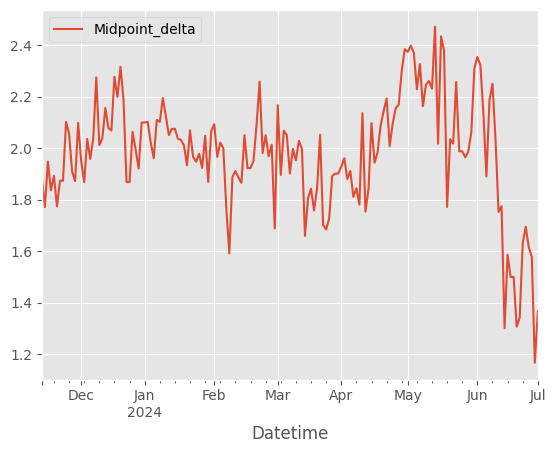

In [213]:
(grt['total']*100).plot(y = 'Midpoint_delta')

In [212]:
grt['long'][0]*100

,Delta,Gamma,Theta,Rho,Vega,Vanna,Volga,Midpoint_delta,Midpoint_gamma,Midpoint_theta,Midpoint_rho,Midpoint_vega,Midpoint_vanna,Midpoint_volga
Datetime,,,,,,,,,,,,,,
2023-11-14,52.559271,0.405525,-6.665496,174.847125,153.414627,39.450651,-1149.294112,52.564096,0.405257,-6.668423,174.839269,153.413221,39.438846,-1150.825278
2023-11-15,51.995544,0.398194,-6.615940,171.830319,152.755687,41.574112,-1024.813631,51.985227,0.398712,-6.610056,171.843350,152.758222,41.602626,-1021.293842
2023-11-16,54.887194,0.394517,-6.852899,183.353007,154.506887,28.304318,-1495.911306,54.902246,0.393336,-6.866067,183.289026,154.498920,28.314661,-1500.739961
2023-11-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.280291,0.405032,-6.679414,172.447980,152.719716,40.560585,-1068.213245
2023-11-20,55.207672,0.402129,-6.826058,183.907490,154.098498,25.844715,-1445.240929,55.453664,0.381228,-7.062921,182.685084,153.957906,26.252212,-1532.893757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-25,82.569341,0.311637,-9.422345,146.607857,80.026553,-245.196985,73278.138003,82.084181,0.309366,-9.641291,145.278732,81.464096,-230.423674,67486.408612
2024-06-26,82.884716,0.306381,-9.439657,146.465997,79.076598,-248.642658,75271.662173,82.603906,0.305220,-9.566382,145.702640,79.922980,-239.935269,71793.191775
2024-06-27,81.249485,0.294854,-10.327622,141.055924,83.768133,-197.765678,55847.057911,82.611303,0.301840,-9.657071,144.823955,79.805421,-236.564036,70708.953815


<Axes: xlabel='Datetime'>

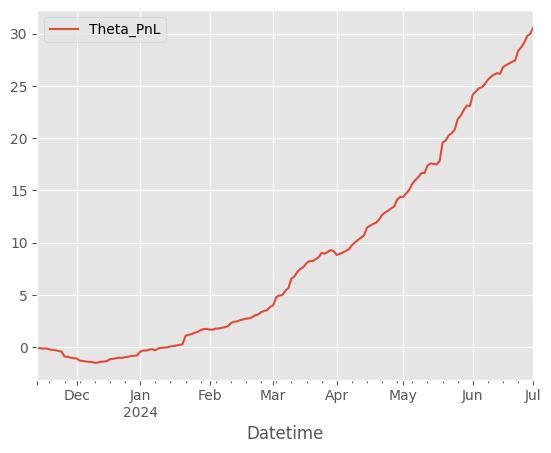

In [183]:
rt['total'].cumsum().plot(y = 'Theta_PnL')

In [151]:
structure.spot(ts = True, ts_start = '2023-07-05')

,Open,High,Low,Close,Midpoint,Volume
Datetime,,,,,,
2023-07-05,2.40,2.40,2.75,2.37,2.000,21
2023-07-06,1.11,0.73,2.74,1.26,1.925,-28
2023-07-07,0.80,0.80,3.20,2.80,1.600,-65
2023-07-10,1.80,0.98,2.17,1.70,1.575,8
2023-07-11,1.50,0.60,2.40,1.30,1.825,-33
2023-07-12,-35.02,-35.02,-33.54,-33.55,1.875,-31
2023-07-13,3.60,2.07,3.60,2.07,1.800,2
2023-07-14,3.25,-1.33,3.25,1.22,1.875,-35
2023-07-17,2.81,1.24,2.55,3.46,2.325,-34


In [45]:
# pnl

# attribution
# pt_greeks
# attribution += pnl
# # pnl
pt_greeks
attribution[attribution.Total_PnL != 0 ]/quantity

,Delta_PnL,Gamma_PnL,Vega_PnL,Volga_PnL,Theta_PnL,Rho_PnL,Vanna_PnL,Dividend_PnL,Total_PnL,Unexplained_PnL,Actual_PnL,Price
2023-07-07,100.197319,-0.642561,94.109883,-3.992267,9.169878,0.000000,-0.791742,0.0,198.050510,-0.228027,197.822483,-3859.441764
2023-07-10,223.900381,-3.441802,157.605718,-6.688296,26.883864,-1.045598,-3.277107,0.0,393.937159,-1.305178,392.631981,-3661.619281
2023-07-11,-7.955254,-0.004992,26.812441,-1.101267,8.526938,-1.479593,0.022497,0.0,24.820769,-0.029326,24.791443,-3268.987299
2023-07-12,-96.992218,-0.748394,18.898604,-0.774177,8.507393,1.065889,0.192337,0.0,-69.850565,0.092523,-69.758042,-3244.195856
2023-07-13,-263.728899,-5.376353,-3.222359,0.131849,8.586708,0.583759,-0.083392,0.0,-263.108687,0.305369,-262.803318,-3313.953898
2023-07-14,-161.480329,-1.838722,-107.115073,4.395554,8.868717,0.702534,-1.482306,0.0,-257.949624,0.331414,-257.618211,-3576.757216
2023-07-17,-430.417749,-11.883335,40.176855,-1.697913,27.593970,-1.627845,1.292310,0.0,-376.563707,0.826231,-375.737476,-3834.375426
2023-07-18,-148.632423,-1.269861,-161.440365,6.948718,9.538938,-1.449220,-1.500639,0.0,-297.804852,0.311053,-297.493799,-4210.112902
2023-07-19,107.200166,-0.607747,-81.851616,3.589318,9.895869,0.295669,0.516016,0.0,39.037676,0.026752,39.064429,-4507.606702
2023-07-20,1451.033987,-115.805471,204.821360,-8.928365,9.940024,0.193222,-22.238678,0.0,1519.016078,-1.615819,1517.400259,-4468.542273


In [43]:
trades

,Ticker,PnL,EntryPrice,ExitPrice,ReturnPct,Quantity,EntryTime,ExitTime,Duration,Positions,Structure
0,TSLA,-2435.488156,200.386768,158.395593,-20.955064,58,2023-07-05,2023-08-02,28,&L:TSLA20240621C333.33&S:TSLA20240621C340,"CallVertical(TSLA, Build On: 2023-08-02 16:00:00)"
1,AAPL,-2.688171,200.843021,200.761561,-0.040559,33,2023-07-05,2023-08-04,30,&L:AAPL20240621C230&S:AAPL20240621C240,"CallVertical(AAPL, Build On: 2023-08-04 16:00:00)"
2,MSFT,-1405.469374,200.989909,160.833641,-19.979246,35,2023-07-05,2023-08-09,35,&L:MSFT20240621C370&S:MSFT20240621C375,"CallVertical(MSFT, Build On: 2023-08-09 16:00:00)"
3,AMZN,-433.030018,200.892755,152.778308,-23.950314,9,2023-07-05,2023-10-25,112,&L:AMZN20240621C170&S:AMZN20240621C182.5,"CallVertical(AMZN, Build On: 2023-10-25 16:00:00)"
4,NVDA,133674.653341,190.394173,2975.282784,1462.696347,48,2023-07-05,2024-07-01,362,&L:NVDA20240621C770&S:NVDA20240621C800,"CallVertical(NVDA, Build On: 2023-07-05 16:00:00)"
5,BA,-240.652620,185.467519,155.385942,-16.219324,8,2023-08-10,2023-08-17,7,&L:BA20240621C300&S:BA20240621C310,"CallVertical(BA, Build On: 2023-08-10 16:00:00)"
6,WMT,2.122548,175.943801,178.066349,1.206379,1,2023-08-10,2023-08-17,7,&L:WMT20240621C175&S:WMT20240621C180,"CallVertical(WMT, Build On: 2023-08-17 16:00:00)"
7,TSLA,-221.844005,200.276447,195.556361,-2.356785,47,2023-08-17,2023-10-20,64,&L:TSLA20240920C305&S:TSLA20240920C315,"CallVertical(TSLA, Build On: 2023-10-20 16:00:00)"
8,AAPL,-1682.755271,199.079386,149.586584,-24.860837,34,2023-08-31,2023-09-07,7,&L:AAPL20240920C260&S:AAPL20240920C310,"CallVertical(AAPL, Build On: 2023-09-07 16:00:00)"
9,INTC,-25.909441,177.260283,151.350843,-14.616608,1,2023-09-15,2023-09-20,5,&L:INTC20240621C40&S:INTC20240621C45,"CallVertical(INTC, Build On: 2023-09-20 16:00:00)"


In [ ]:
threading.active_count()

<Axes: xlabel='Datetime'>

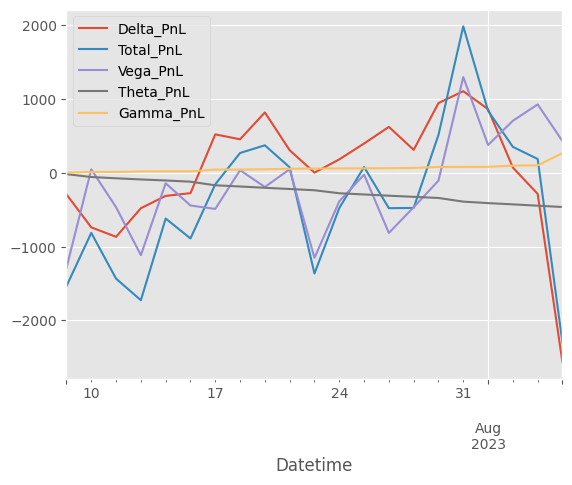

In [48]:
attribution = pnl.copy() * quantity
attribution.cumsum().plot(y = ['Delta_PnL', 'Total_PnL', 'Vega_PnL', 'Theta_PnL', 'Gamma_PnL'])